In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score


we want to divide custome by their charachteristic 
like demographics or behaviours 

In [112]:
data=pd.read_csv("Customer DataSet.csv")

In [113]:
data=pd.DataFrame(data)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [114]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [115]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [117]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [118]:
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [119]:
#checking if there is any null data
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [120]:
#deleting null data

data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [121]:

data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [133]:

columns_to_keep = ['PAYMENTS', 'PURCHASES_FREQUENCY']
data = data.drop([col for col in data.columns if col not in columns_to_keep], axis=1)



In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PURCHASES_FREQUENCY  8636 non-null   float64
 1   PAYMENTS             8636 non-null   float64
dtypes: float64(2)
memory usage: 135.1 KB


In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

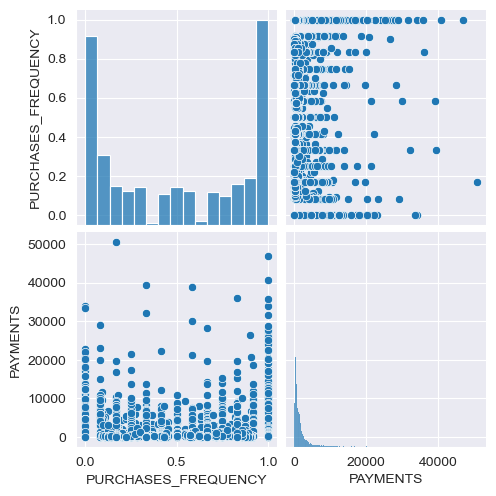

In [136]:
sns.pairplot(data)

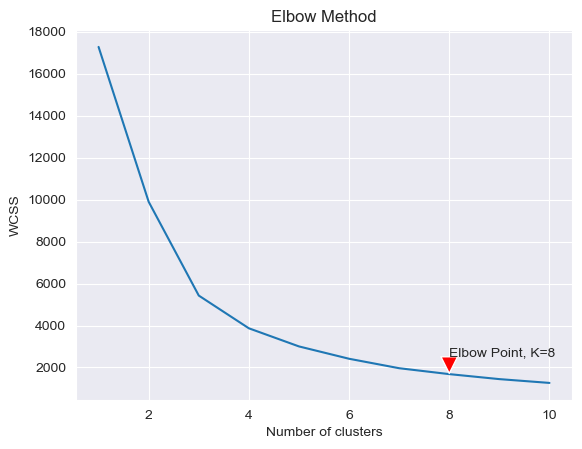

In [137]:
#elbow method
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plotting Wcss
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


changes = np.diff(wcss)
elbow = np.argmin(changes[1:] - changes[:-1]) + 2  # looking for the "elbow"

plt.annotate('Elbow Point, K={}'.format(elbow), xy=(elbow, wcss[elbow-1]),
             xytext=(elbow, wcss[elbow-1]+0.05*np.ptp(wcss)),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


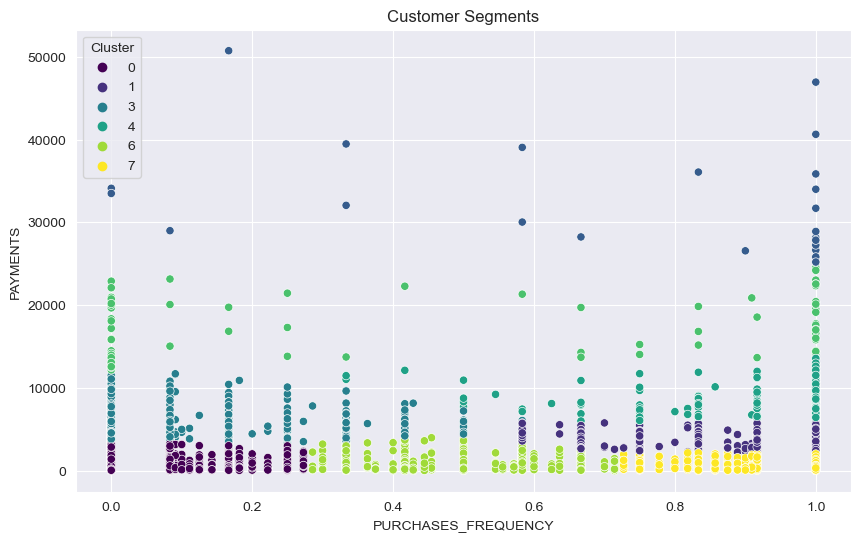

Cluster 0:
       PURCHASES_FREQUENCY     PAYMENTS
count          3090.000000  3090.000000
mean              0.065118   866.506587
std               0.085887   735.986676
min               0.000000     0.049513
25%               0.000000   321.565124
50%               0.000000   607.008082
75%               0.090909  1232.536627
max               0.272727  3357.944033
Cluster 1:
       PURCHASES_FREQUENCY     PAYMENTS
count           803.000000   803.000000
mean              0.924402  3516.253865
std               0.118864   994.522185
min               0.500000  2165.330989
25%               0.875000  2652.595121
50%               1.000000  3319.325665
75%               1.000000  4183.044769
max               1.000000  5990.392370
Cluster 2:
       PURCHASES_FREQUENCY      PAYMENTS
count            23.000000     23.000000
mean              0.716667  32942.069538
std               0.373761   6771.544009
min               0.000000  25203.913360
25%               0.458333  27995.401115
5

In [140]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it has been loaded correctly
# Selecting relevant features for clustering
features = data[['PURCHASES_FREQUENCY', 'PAYMENTS']]

# Scaling the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying K-Means Clustering
# Determine the number of clusters, here using K=3 as an example
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(features_scaled)

# Adding the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Plotting the results to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PURCHASES_FREQUENCY', y='PAYMENTS', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

# Analyzing clusters
for i in range(3):
    print(f"Cluster {i}:")
    cluster_data = data[data['Cluster'] == i]
    print(cluster_data[['PURCHASES_FREQUENCY', 'PAYMENTS']].describe())


In [141]:
silhouette_score(X_scaled, kmeans.labels_)

0.5262410846218846

hirarchial clustering 

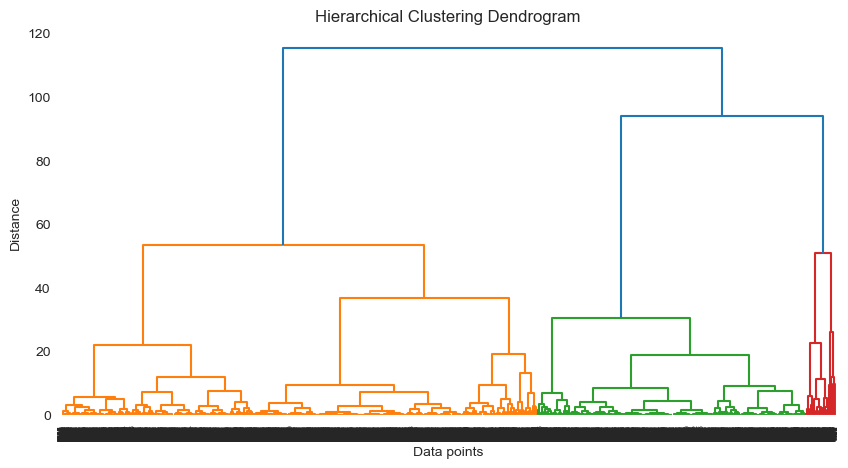

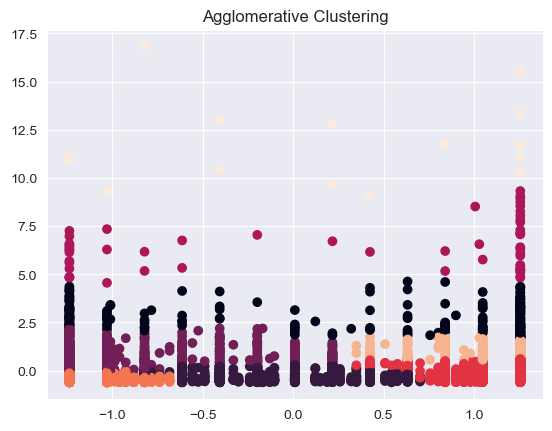

In [142]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# create dendrogram to determine number of clusters
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

# apply agglomerative clustering with 8 clusters
agg_clustering = AgglomerativeClustering(n_clusters=8, linkage='ward')
agg_clustering.fit(X_scaled)

# visualize clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_clustering.labels_)
plt.title('Agglomerative Clustering')
plt.show()

In [143]:
silhouette_score(X_scaled, kmeans.labels_)

0.5262410846218846

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_customer = scaler.fit_transform(data)
print(norm_customer)

[[0.166667   0.00397766 0.        ]
 [0.         0.08089249 0.42857143]
 [1.         0.0122634  1.        ]
 ...
 [0.833333   0.00160132 1.        ]
 [0.         0.00103507 0.        ]
 [0.666667   0.00124436 0.85714286]]


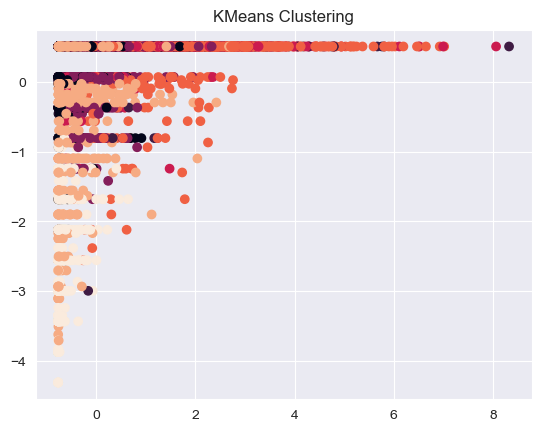

In [159]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_)
plt.title('KMeans Clustering')
plt.show()


segmeting customers based on their behavior
High Frequency, High Payments
High Frequency, Low Payments
Low Frequency, High Payments
Low Frequency, Low Payments

In [160]:
cluster_stats = data.groupby('Cluster')[['PURCHASES_FREQUENCY', 'PAYMENTS']].describe()
print(cluster_stats)

        PURCHASES_FREQUENCY                                               \
                      count      mean       std       min       25%  50%   
Cluster                                                                    
0                    3090.0  0.065118  0.085887  0.000000  0.000000  0.0   
1                     803.0  0.924402  0.118864  0.500000  0.875000  1.0   
2                      23.0  0.716667  0.373761  0.000000  0.458333  1.0   
3                     406.0  0.110345  0.147602  0.000000  0.000000  0.0   
4                     213.0  0.920374  0.138186  0.333333  0.857143  1.0   
5                      72.0  0.491793  0.452281  0.000000  0.000000  0.5   
6                    1662.0  0.496295  0.116923  0.285714  0.416667  0.5   
7                    2367.0  0.938898  0.086928  0.727273  0.888889  1.0   

                            PAYMENTS                                           \
              75%       max    count          mean          std           min   
C

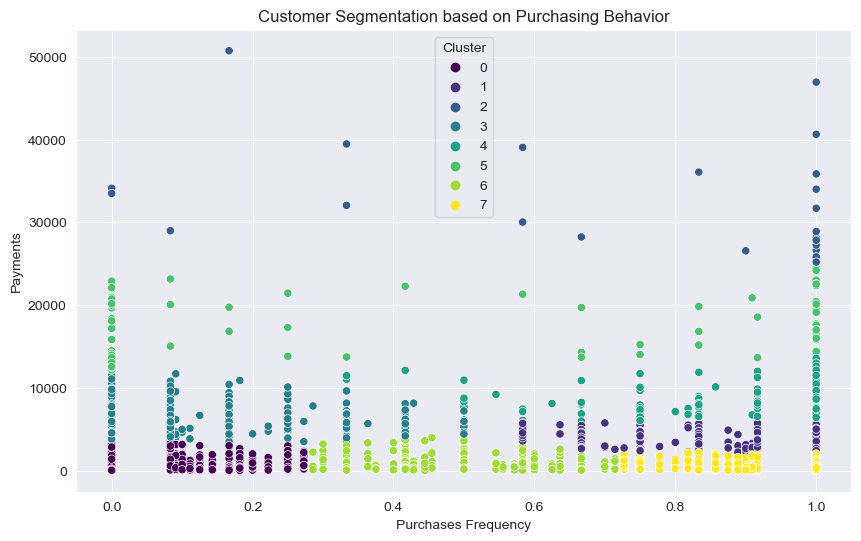

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting clusters to visualize the segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PURCHASES_FREQUENCY', y='PAYMENTS', hue='Cluster', palette='viridis', legend='full')
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.xlabel('Purchases Frequency')
plt.ylabel('Payments')
plt.legend(title='Cluster')
plt.show()


In [163]:
#clustering based on customer behaviur
for i in range(8):  # Assuming you have 8 clusters from 0 to 7
    cluster_summary = data[data['Cluster'] == i]
    print(f"Cluster {i} Summary:")
    print(f"Average Purchases Frequency: {cluster_summary['PURCHASES_FREQUENCY'].mean():.2f}")
    print(f"Average Payments: {cluster_summary['PAYMENTS'].mean():.2f}")
    print(f"Count: {cluster_summary.shape[0]}")
    print("-----")


Cluster 0 Summary:
Average Purchases Frequency: 0.07
Average Payments: 866.51
Count: 3090
-----
Cluster 1 Summary:
Average Purchases Frequency: 0.92
Average Payments: 3516.25
Count: 803
-----
Cluster 2 Summary:
Average Purchases Frequency: 0.72
Average Payments: 32942.07
Count: 23
-----
Cluster 3 Summary:
Average Purchases Frequency: 0.11
Average Payments: 5805.45
Count: 406
-----
Cluster 4 Summary:
Average Purchases Frequency: 0.92
Average Payments: 8519.03
Count: 213
-----
Cluster 5 Summary:
Average Purchases Frequency: 0.49
Average Payments: 17520.89
Count: 72
-----
Cluster 6 Summary:
Average Purchases Frequency: 0.50
Average Payments: 937.87
Count: 1662
-----
Cluster 7 Summary:
Average Purchases Frequency: 0.94
Average Payments: 912.64
Count: 2367
-----
